In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('train.csv')

# Tampilkan 5 baris pertama
print("=== 5 Baris Pertama Dataset ===")
print(df.head())

# Ambil kolom numerik
df_num = df.select_dtypes(include=[np.number])

# Statistik deskriptif
print("\n=== Statistik Deskriptif Lengkap (Kolom Numerik Saja) ===")
desc = df_num.describe().T
desc['median'] = df_num.median()
desc['Q1'] = df_num.quantile(0.25)
desc['Q2'] = df_num.quantile(0.50)
desc['Q3'] = df_num.quantile(0.75)
desc['non_null_count'] = df_num.count()
desc['missing'] = df_num.isnull().sum()

# Tampilkan statistik yang diminta
print(desc[['mean', 'median', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max', 'non_null_count', 'missing']])

# Tampilkan kolom dengan nilai hilang dari seluruh dataset
print("\n=== Kolom dengan Nilai Hilang (Semua Tipe Data) ===")
missing_cols = df.columns[df.isnull().any()]
print(df[missing_cols].isnull().sum())


=== 5 Baris Pertama Dataset ===
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  S

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('train.csv')

# Encoding fitur kategorikal (non-numerik) menggunakan One-Hot Encoding
df_encoded = pd.get_dummies(df)

# Pisahkan fitur dan target
X = df_encoded.drop(columns=["SalePrice", "Id"])  # 'Id' juga tidak relevan
Y = df_encoded["SalePrice"]

# Split data: 80% training, 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tampilkan dimensi hasil split
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)
print("Ukuran Y_train:", Y_train.shape)
print("Ukuran Y_test :", Y_test.shape)


Ukuran X_train: (1168, 287)
Ukuran X_test : (292, 287)
Ukuran Y_train: (1168,)
Ukuran Y_test : (292,)


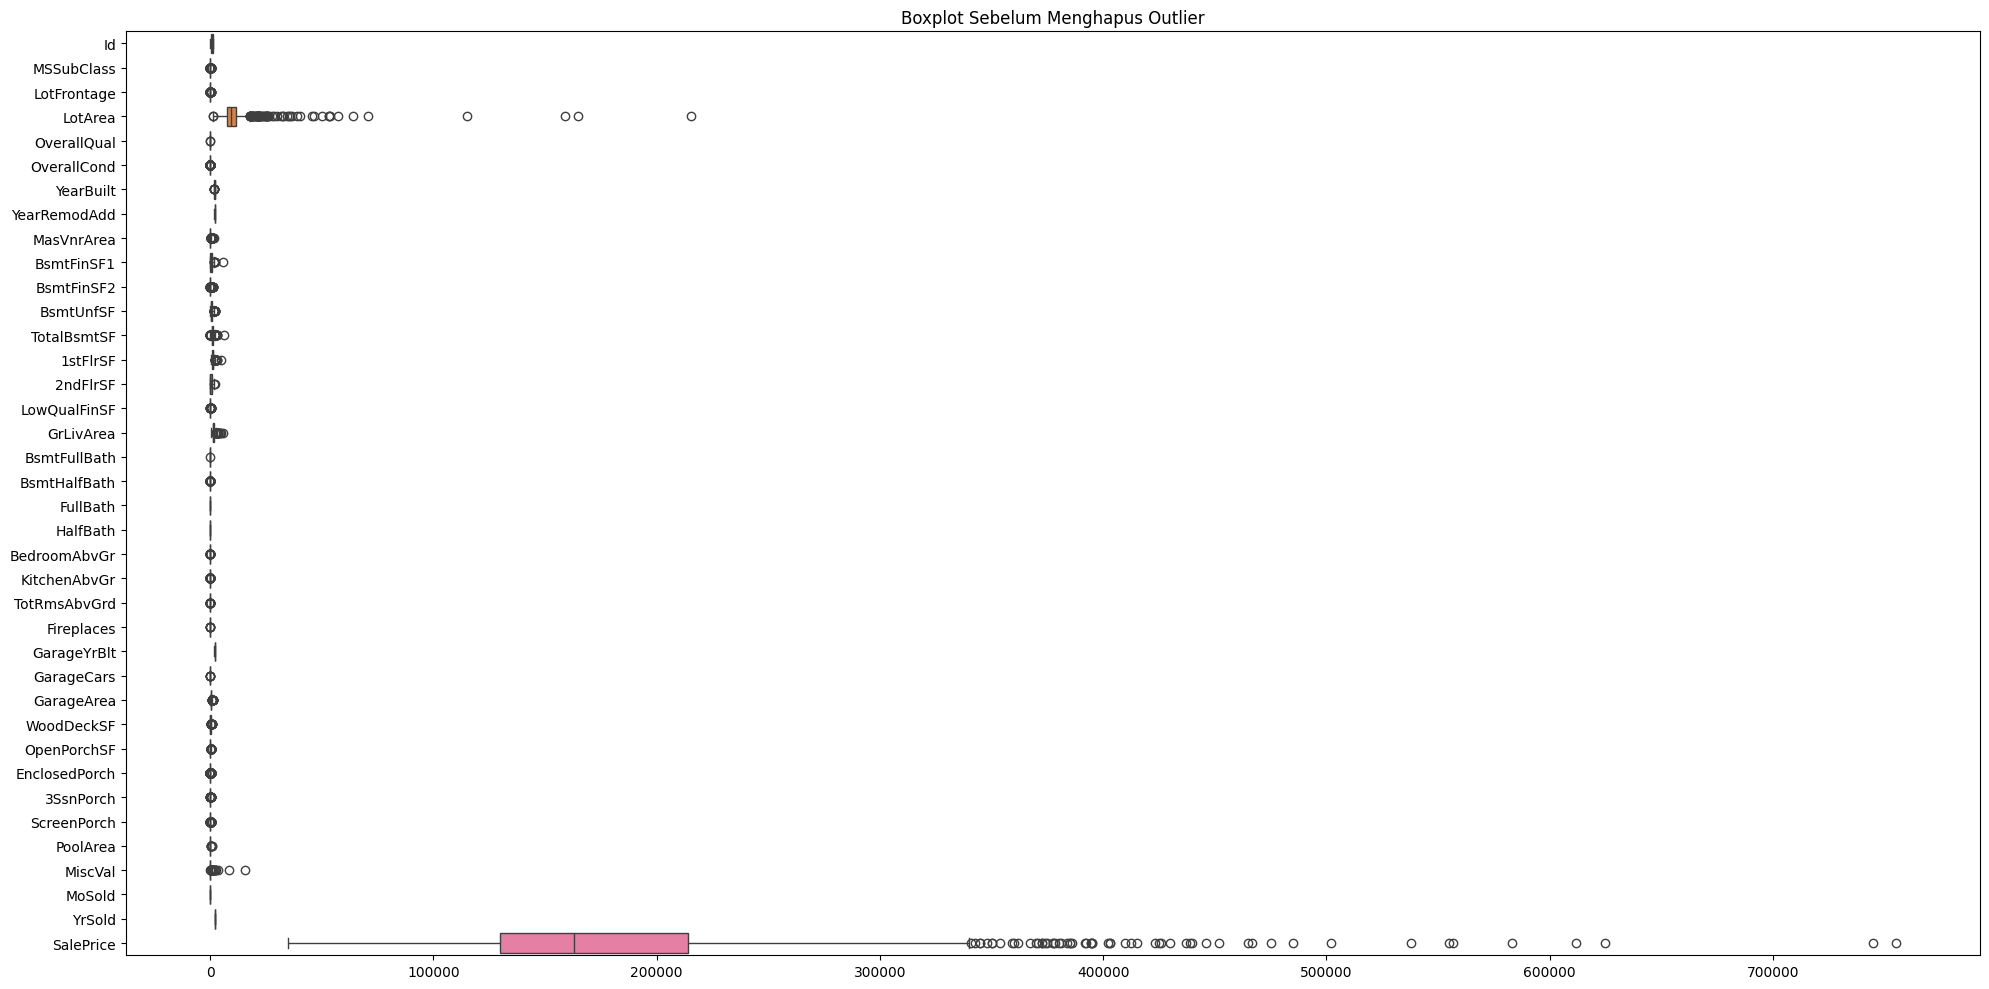

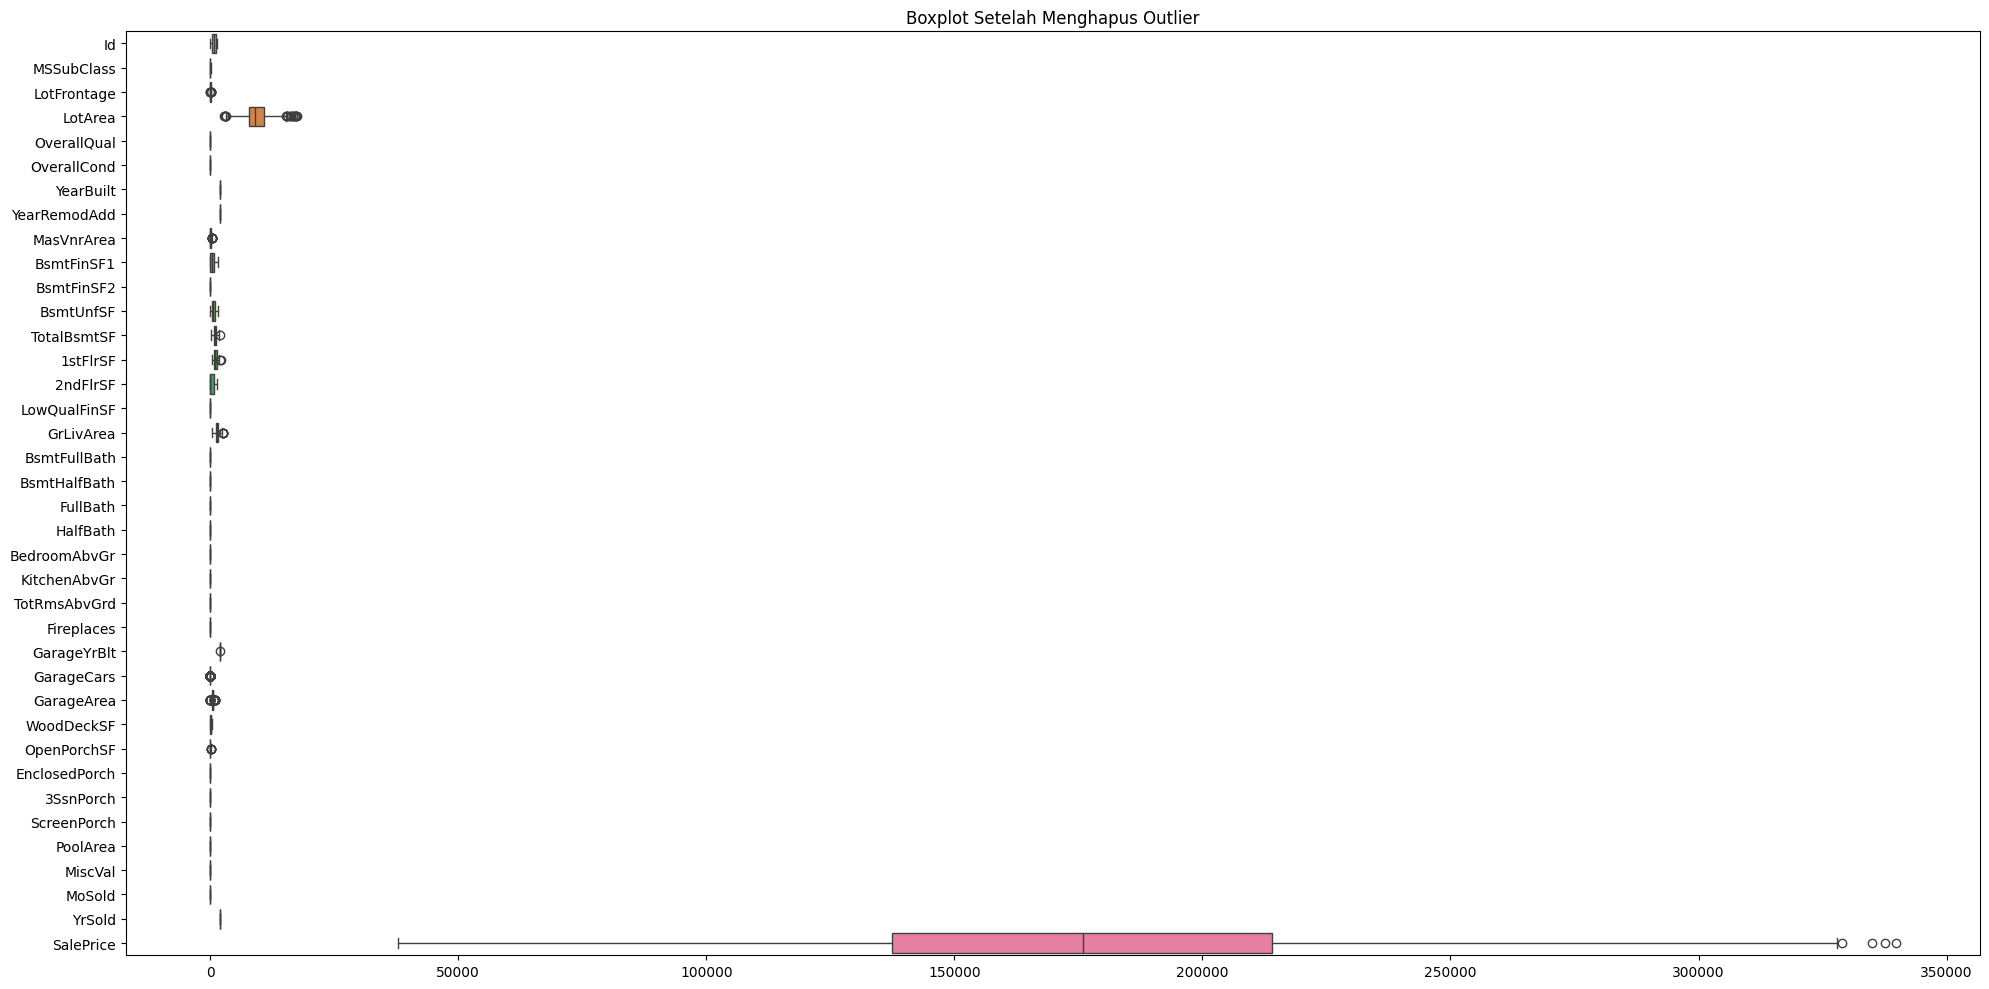

Jumlah data awal: 1460
Jumlah data setelah menghapus outlier: 563
Jumlah data yang dihapus: 897


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data
df = pd.read_csv("train.csv")

# Buat folder untuk menyimpan gambar boxplot
os.makedirs("boxplots", exist_ok=True)

# Ambil hanya kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

# ========== Boxplot Sebelum Outlier ==========
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_numeric, orient="h")
plt.title("Boxplot Sebelum Menghapus Outlier")
plt.tight_layout()
plt.savefig("boxplots/boxplot_sebelum_outlier.png")
plt.show()

# ========== Identifikasi Outlier dengan IQR ==========
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filter: dataset tanpa outlier
df_no_outliers = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) |
                              (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

# ========== Boxplot Setelah Outlier Dihapus ==========
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers, orient="h")
plt.title("Boxplot Setelah Menghapus Outlier")
plt.tight_layout()
plt.savefig("boxplots/boxplot_setelah_outlier.png")
plt.show()

# ========== Informasi ==========
print("Jumlah data awal:", df_numeric.shape[0])
print("Jumlah data setelah menghapus outlier:", df_no_outliers.shape[0])
print("Jumlah data yang dihapus:", df_numeric.shape[0] - df_no_outliers.shape[0])


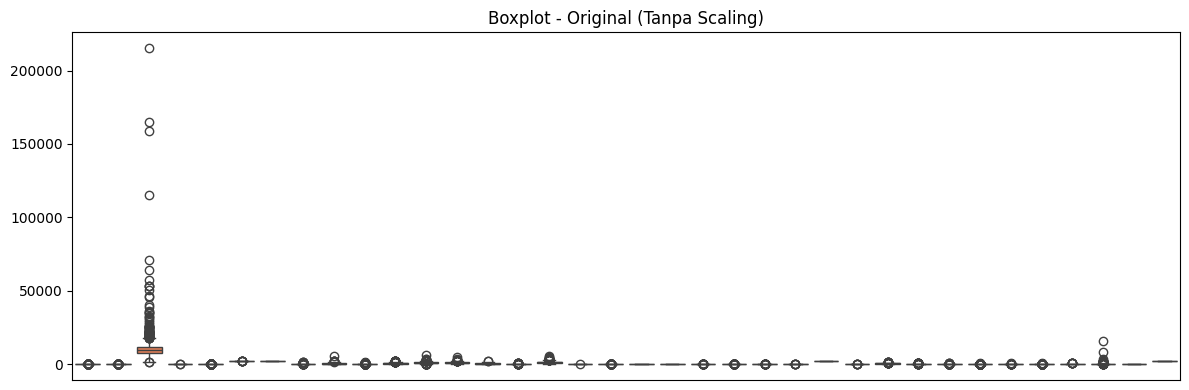

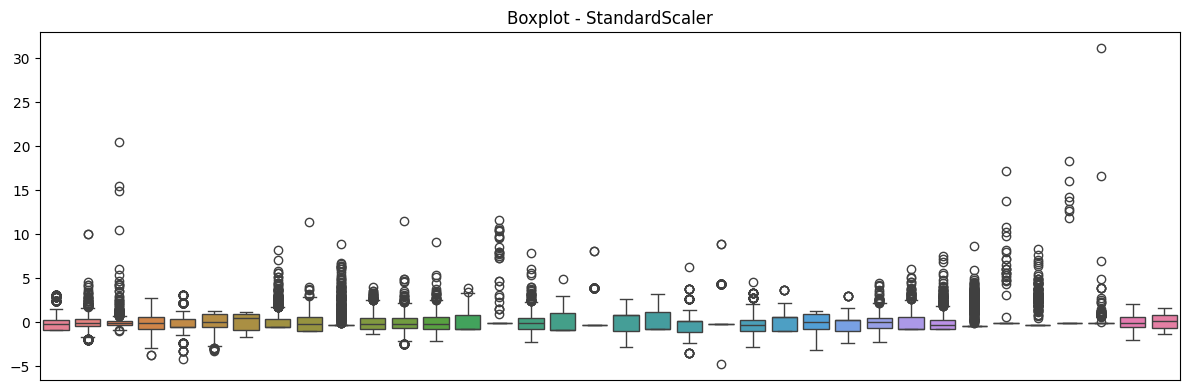

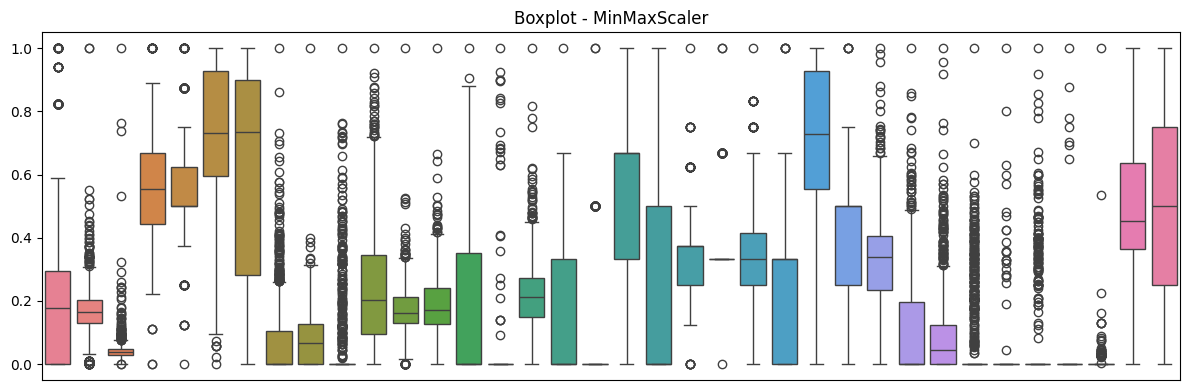

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load dataset tanpa outlier hasil sebelumnya
# Gantilah file CSV ini dengan dataset tanpa outlier milikmu kalau disimpan
df = pd.read_csv("train.csv")

# Ambil fitur numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Buang kolom target dan ID
X = df_numeric.drop(columns=["Id", "SalePrice"])

# -------------------------------
# 1. Original (Tanpa Scaling)
# -------------------------------
plt.figure(figsize=(12, 4))
sns.boxplot(data=X)
plt.title("Boxplot - Original (Tanpa Scaling)")
plt.xticks([], [])
plt.tight_layout()
plt.show()

# -------------------------------
# 2. StandardScaler
# -------------------------------
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

plt.figure(figsize=(12, 4))
sns.boxplot(data=pd.DataFrame(X_standard, columns=X.columns))
plt.title("Boxplot - StandardScaler")
plt.xticks([], [])
plt.tight_layout()
plt.show()

# -------------------------------
# 3. MinMaxScaler
# -------------------------------
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

plt.figure(figsize=(12, 4))
sns.boxplot(data=pd.DataFrame(X_minmax, columns=X.columns))
plt.title("Boxplot - MinMaxScaler")
plt.xticks([], [])
plt.tight_layout()
plt.show()


=== Model dengan Outlier ===
MSE: 1194210396.7413719
R² : 0.8443077433105267

=== Model tanpa Outlier + Scaling ===
MSE: 2567321023.5479035
R² : 0.6652918071277968


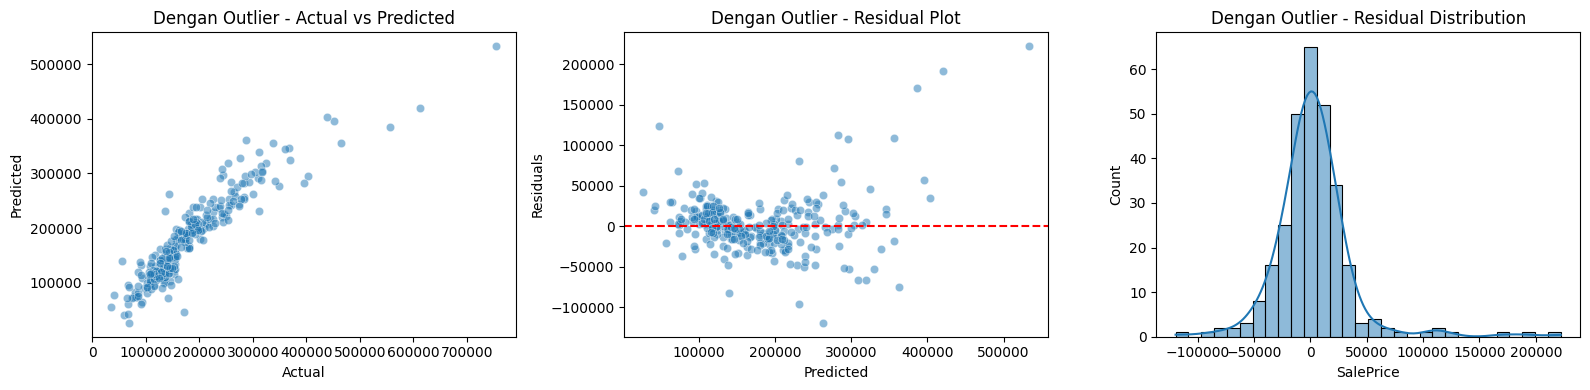

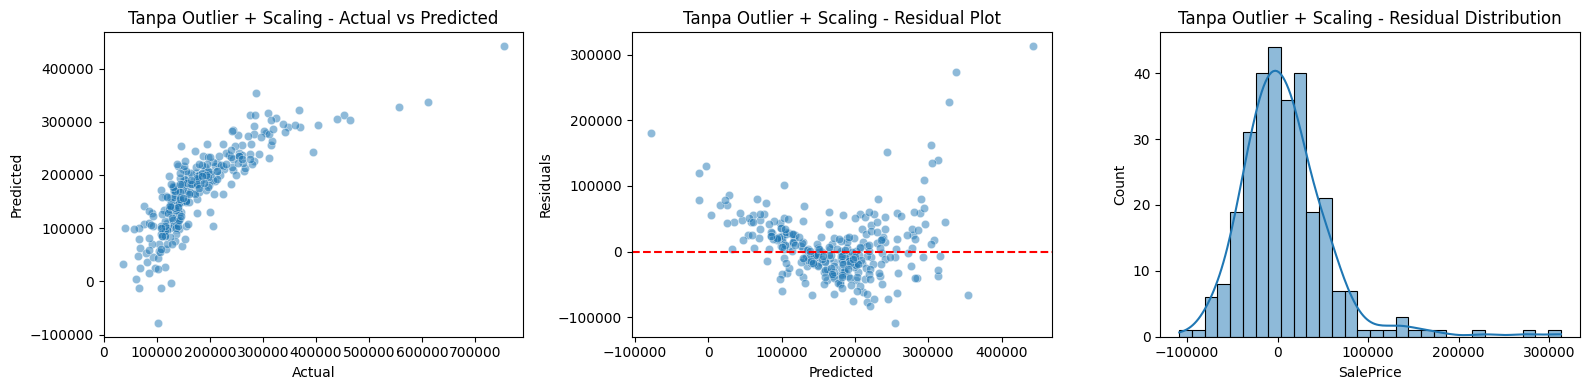

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# =============================
# 1. Load dan Preprocessing Data
# =============================
df = pd.read_csv("train.csv")

# Encoding fitur kategorikal
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Isi missing value dengan median
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))

# Pisahkan fitur dan target
X = df_encoded.drop(columns=["SalePrice", "Id"])
y = df_encoded["SalePrice"]

# Split data (dengan outlier)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 2. Model dengan Outlier
# =============================
model_outlier = LinearRegression()
model_outlier.fit(X_train, y_train)

y_pred_outlier = model_outlier.predict(X_test)
mse_outlier = mean_squared_error(y_test, y_pred_outlier)
r2_outlier = r2_score(y_test, y_pred_outlier)

print("=== Model dengan Outlier ===")
print("MSE:", mse_outlier)
print("R² :", r2_outlier)

# =============================
# 3. Model tanpa Outlier + Scaling
# =============================
# Outlier Handling (IQR)
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)

X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)  # Gunakan scaler dari training data

# Model
model_clean = LinearRegression()
model_clean.fit(X_train_scaled, y_train_clean)

y_pred_clean = model_clean.predict(X_test_scaled)
mse_clean = mean_squared_error(y_test, y_pred_clean)
r2_clean = r2_score(y_test, y_pred_clean)

print("\n=== Model tanpa Outlier + Scaling ===")
print("MSE:", mse_clean)
print("R² :", r2_clean)

# =============================
# 4. Visualisasi Hasil Prediksi
# =============================
def plot_evaluation(y_true, y_pred, title_prefix):
    residuals = y_true - y_pred

    plt.figure(figsize=(16, 4))

    # Scatter plot: Prediksi vs Aktual
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{title_prefix} - Actual vs Predicted")

    # Residual Plot
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"{title_prefix} - Residual Plot")

    # Distribusi Residual
    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"{title_prefix} - Residual Distribution")

    plt.tight_layout()
    plt.show()

# Plot untuk model outlier
plot_evaluation(y_test, y_pred_outlier, "Dengan Outlier")

# Plot untuk model clean
plot_evaluation(y_test, y_pred_clean, "Tanpa Outlier + Scaling")



=== Polynomial Regression Degree 2 ===
MSE: 4165170108.8716483
R² : 0.45697614464312253


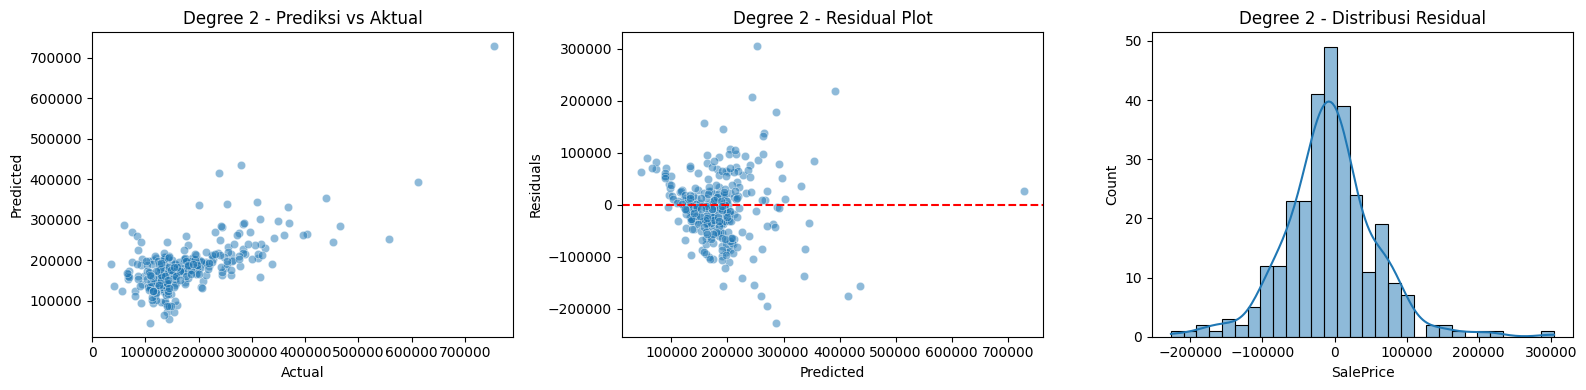


=== Polynomial Regression Degree 3 ===
MSE: 118798885813.28229
R² : -14.48811388255786


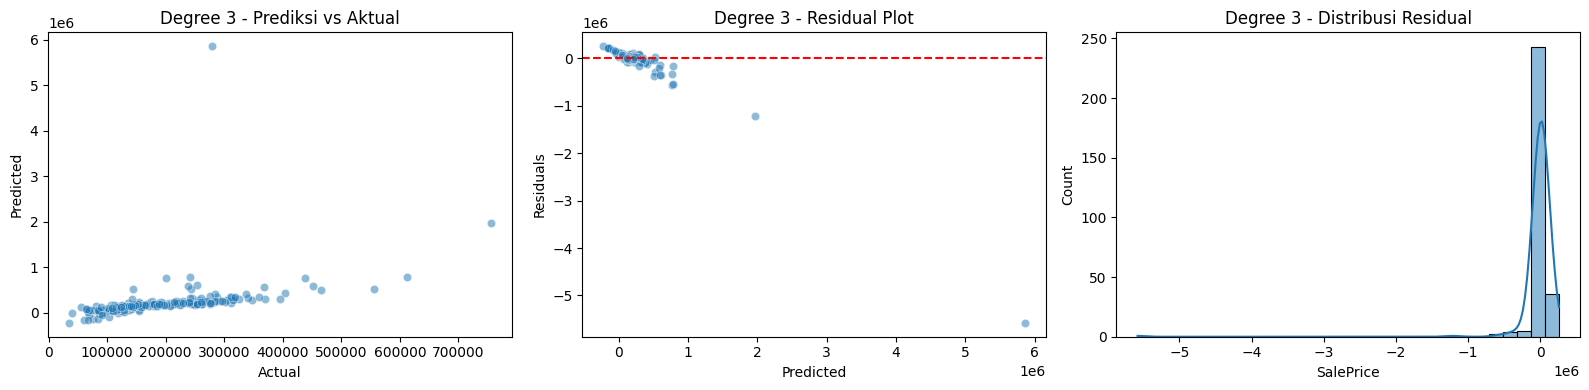

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# =============================
# 1. Load dan Preprocessing Data
# =============================
df = pd.read_csv("train.csv")

# Label Encoding
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Isi NaN dengan median
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))

# Fitur dan target
X = df_encoded.drop(columns=["SalePrice", "Id"])
y = df_encoded["SalePrice"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 2. Outlier Handling
# =============================
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

# =============================
# 3. Feature Scaling
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

# =============================
# 4. Polynomial Regression (Degree 2 & 3)
# =============================
def evaluate_polynomial_model(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train_clean)
    y_pred = model_poly.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== Polynomial Regression Degree {degree} ===")
    print("MSE:", mse)
    print("R² :", r2)

    # Visualisasi
    residuals = y_test - y_pred
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Degree {degree} - Prediksi vs Aktual")

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"Degree {degree} - Residual Plot")

    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"Degree {degree} - Distribusi Residual")

    plt.tight_layout()
    plt.show()

    return mse, r2

# Evaluasi Polynomial Regression degree 2 & 3
mse2, r2_2 = evaluate_polynomial_model(degree=2)
mse3, r2_3 = evaluate_polynomial_model(degree=3)



=== KNN Regression (k=3) ===
MSE: 3510114712.7949014
R² : 0.5423773881342999


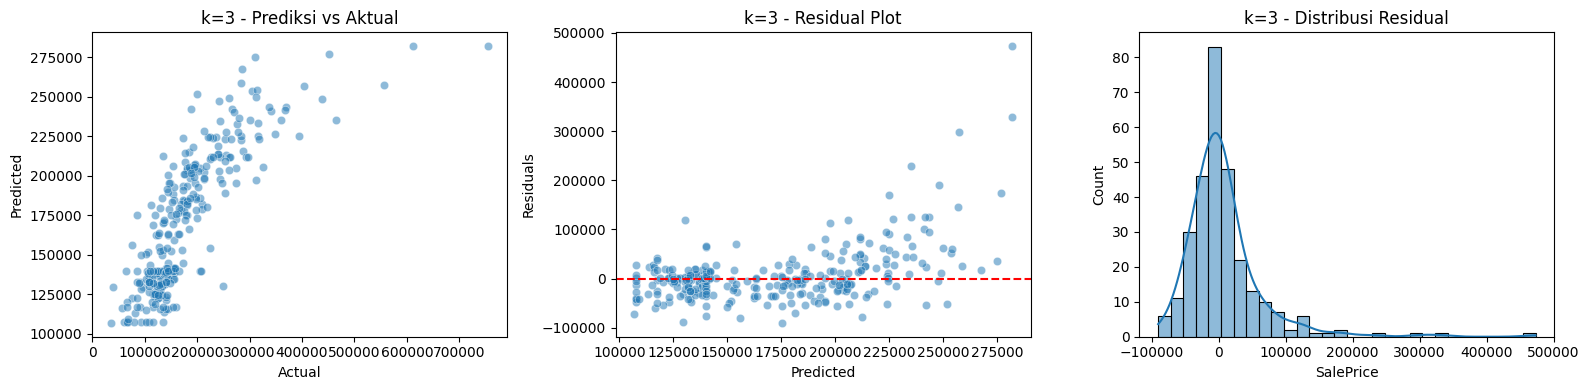


=== KNN Regression (k=5) ===
MSE: 3716293603.9404106
R² : 0.515497319989047


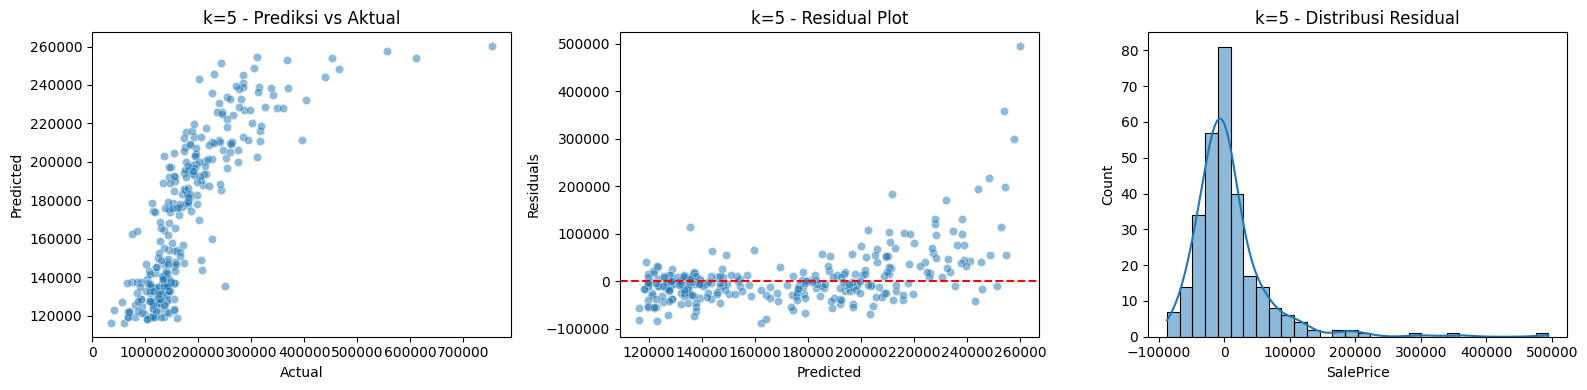


=== KNN Regression (k=7) ===
MSE: 3861625762.9248676
R² : 0.4965499955782182


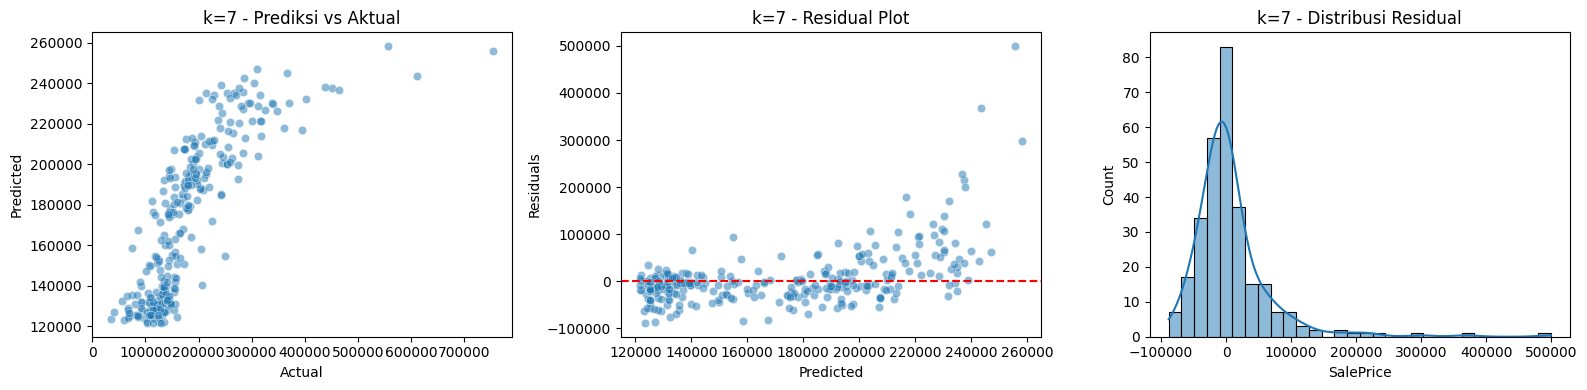

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# =============================
# 1. Load dan Preprocessing Data
# =============================
df = pd.read_csv("train.csv")

# Label Encoding
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Imputasi NaN dengan median
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))

# Fitur dan target
X = df_encoded.drop(columns=["SalePrice", "Id"])
y = df_encoded["SalePrice"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 2. Outlier Handling
# =============================
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

# =============================
# 3. Feature Scaling
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

# =============================
# 4. KNN Regression
# =============================
def evaluate_knn(k):
    model_knn = KNeighborsRegressor(n_neighbors=k)
    model_knn.fit(X_train_scaled, y_train_clean)
    y_pred = model_knn.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== KNN Regression (k={k}) ===")
    print("MSE:", mse)
    print("R² :", r2)

    # Visualisasi
    residuals = y_test - y_pred
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"k={k} - Prediksi vs Aktual")

    plt.subplot(1, 3, 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"k={k} - Residual Plot")

    plt.subplot(1, 3, 3)
    sns.histplot(residuals, kde=True, bins=30)
    plt.title(f"k={k} - Distribusi Residual")

    plt.tight_layout()
    plt.show()

    return mse, r2

# Evaluasi untuk K = 3, 5, 7
mse_3, r2_3 = evaluate_knn(k=3)
mse_5, r2_5 = evaluate_knn(k=5)
mse_7, r2_7 = evaluate_knn(k=7)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
